In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm

## 1. Define Gaussian shaped place fields

Most (72%) place cells had single place fields in the cylinder, whereas in the chamber, this dropped to 11%. The vast majority (89%) of place cells had multiple place fields on the chamber floor (Fig. 3A). Whereas in the cylinder each place cell had on average 1.3 ± 0.03 place fields, each place cell had 3.4 ± 0.11 place fields on the chamber floor (p < 0.001) (Fig. 3B). In fact, the number of place fields was even greater in the chamber, 4.05 ± 0.10, when firing on the chamber stairs was also considered. [JoN2008](https://www.jneurosci.org/content/28/44/11250)

In [2]:
n = 60
mu_cell = []
sigma_cell = []
position_grid = np.linspace(0,10,201)
for i in range(n):
    n_pf = np.random.randint(low=1, high=4) # decide how many place field a neuron has
    mu_cell.append(np.random.choice(position_grid, size=n_pf, replace=False))
    sigma_cell.append(np.abs(norm.rvs(scale=.3, size=n_pf))+.3)

(0.0, 2.0)

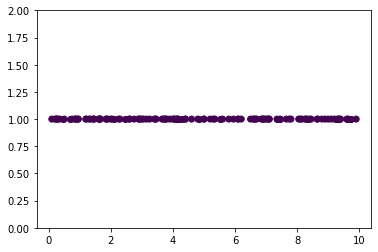

In [3]:
for i in range(60):
    plt.scatter(mu_cell[i],np.ones_like(mu_cell[i]),c=np.ones_like(mu_cell[i])*i)
plt.ylim(0,2)

In [4]:
tuning_curves = []
for i in range(n):
    tuning_curves.append(norm(loc=mu_cell[i], scale=sigma_cell[i]))

x.shape: (201,); p.shape: (201,)


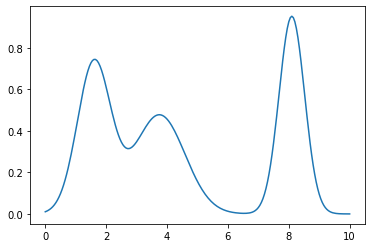

In [5]:
cell = 23
p = np.sum(tuning_curves[cell].pdf(np.tile(position_grid,(len(mu_cell[cell]),1)).T),axis=1)
print(f'x.shape: {position_grid.shape}; p.shape: {p.shape}')

plt.plot(position_grid,p)

In [6]:
PFR = norm.rvs(loc=4, scale=1, size=n, random_state=2)
print(f'Peak firing rate: {PFR}')

Peak firing rate: [3.58324215 3.94373317 1.8638039  5.64027081 2.20656441 3.15825263
 4.50288142 2.75471191 2.94204778 3.09099239 4.55145404 6.29220801
 4.04153939 2.88207455 4.53905832 3.4038403  3.9808695  5.17500122
 3.25212905 4.00902525 3.12189211 3.84356583 4.25657045 3.01122095
 3.66117803 3.76381597 3.36234499 2.81238771 2.57878277 3.8465048
 3.73094304 6.23136679 1.56523242 4.1127265  4.37044454 5.35963386
 4.50185721 3.1557863  4.00000976 4.54235257 3.6864918  4.77101174
 2.13190935 5.73118467 5.46767801 3.66432266 4.61134078 4.04797059
 3.17086471 4.08771022 5.00036589 3.61890748 3.62433058 3.92552924
 4.43349633 5.27837923 3.36532069 4.50839624 4.21611601 2.14138761]


## 2. Define animal position

In [7]:
from scipy.io import loadmat

In [8]:
data = loadmat('maze2_run.mat')

In [9]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pos_linear', 'pos_origin', 'speed_linear', 'spikes', 'idx'])

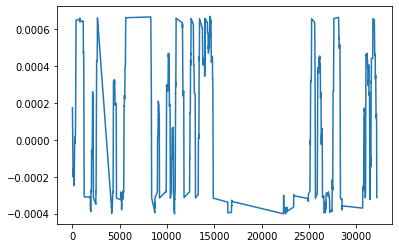

In [10]:
# Using true animal positions
position = data['pos_linear'].squeeze()
idx = data['idx'].squeeze()
plt.plot(idx, position)

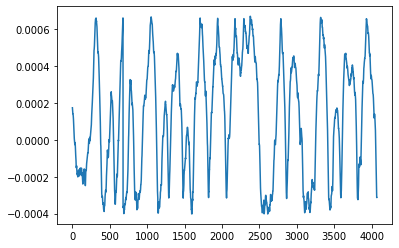

In [11]:
plt.plot(position)

In [4]:
# Sine position
position = np.sin(np.arange(1000)/32)
position.shape

(1000,)

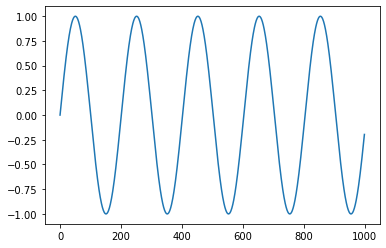

In [5]:
plt.plot(position)

In [34]:
## Triangle position
# position = (-1)**(np.arange(1000)//100)*(np.arange(1000)%100)+100*((np.arange(1000)//100)%2)

Text(0, 0.5, 'position')

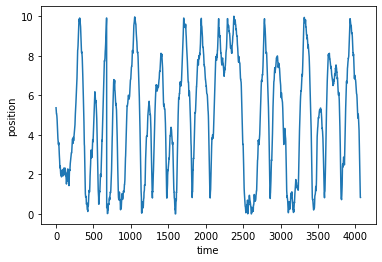

In [12]:
position -= position.min()
position = position/position.max()*10
plt.plot(position)
plt.xlabel('time')
plt.ylabel('position')

In [9]:
p_hat = position

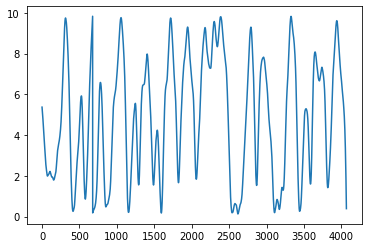

In [13]:
from scipy.signal import savgol_filter
p_hat = np.concatenate((savgol_filter(position[:677], 71, 3),savgol_filter(position[677:], 71, 3)))
plt.plot(p_hat)

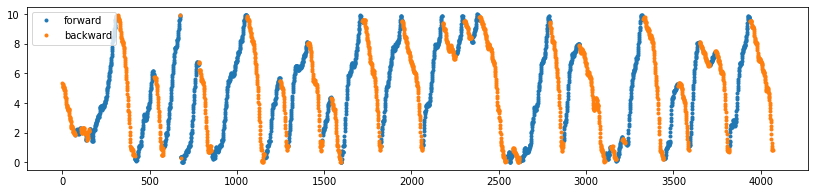

In [14]:
g = np.gradient(p_hat)
fwd = np.where(g>0)[0]
bwd = np.where(g<=0)[0]
plt.figure(figsize=(14,3))
plt.plot(fwd,position[fwd],'.',label='forward')
plt.plot(bwd,position[bwd],'.',label='backward')
plt.legend()

### Show place fields

In [19]:
direction_weight = truncnorm.rvs(0, .8, loc=0, scale=1, size=n)

In [20]:
direction_weight

array([0.02621031, 0.70392706, 0.31508904, 0.25476918, 0.30028496,
       0.37024686, 0.46086303, 0.15920511, 0.18330044, 0.23514372,
       0.20258369, 0.40659789, 0.03763855, 0.23446001, 0.62530451,
       0.39437647, 0.45017671, 0.3129745 , 0.02581587, 0.26772553,
       0.03410378, 0.23037412, 0.49245152, 0.45554124, 0.28938513,
       0.33120965, 0.78010681, 0.67642119, 0.02989307, 0.60454395,
       0.19380744, 0.75923186, 0.77173262, 0.13482969, 0.48942709,
       0.48793036, 0.65516705, 0.13968785, 0.15866177, 0.32107207,
       0.02750453, 0.64841034, 0.27985791, 0.5753753 , 0.65128075,
       0.74943307, 0.22604824, 0.62860182, 0.7140244 , 0.03806934,
       0.08685706, 0.01060642, 0.33040062, 0.4329183 , 0.3003864 ,
       0.70099458, 0.41118673, 0.16130386, 0.12823241, 0.54263978])

In [21]:
fwd_weight = direction_weight.copy()
fwd_weight[20:] = 1
fwd_weight

array([0.02621031, 0.70392706, 0.31508904, 0.25476918, 0.30028496,
       0.37024686, 0.46086303, 0.15920511, 0.18330044, 0.23514372,
       0.20258369, 0.40659789, 0.03763855, 0.23446001, 0.62530451,
       0.39437647, 0.45017671, 0.3129745 , 0.02581587, 0.26772553,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [22]:
PFR*fwd_weight

array([0.09391789, 2.7761005 , 0.58726419, 1.4369672 , 0.66259812,
       1.16933313, 2.07521158, 0.43856421, 0.53927865, 0.72682744,
       0.92205035, 2.55839848, 0.15211767, 0.67573123, 2.83829363,
       1.34239454, 1.79209472, 1.6196434 , 0.08395656, 1.07331839,
       3.12189211, 3.84356583, 4.25657045, 3.01122095, 3.66117803,
       3.76381597, 3.36234499, 2.81238771, 2.57878277, 3.8465048 ,
       3.73094304, 6.23136679, 1.56523242, 4.1127265 , 4.37044454,
       5.35963386, 4.50185721, 3.1557863 , 4.00000976, 4.54235257,
       3.6864918 , 4.77101174, 2.13190935, 5.73118467, 5.46767801,
       3.66432266, 4.61134078, 4.04797059, 3.17086471, 4.08771022,
       5.00036589, 3.61890748, 3.62433058, 3.92552924, 4.43349633,
       5.27837923, 3.36532069, 4.50839624, 4.21611601, 2.14138761])

In [23]:
bwd_weight = direction_weight.copy()
bwd_weight[:20] = 1
bwd_weight[40:] = 1
bwd_weight

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.03410378, 0.23037412, 0.49245152, 0.45554124, 0.28938513,
       0.33120965, 0.78010681, 0.67642119, 0.02989307, 0.60454395,
       0.19380744, 0.75923186, 0.77173262, 0.13482969, 0.48942709,
       0.48793036, 0.65516705, 0.13968785, 0.15866177, 0.32107207,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [12]:
# def pos_firing_rate(pos, tuning_curves, mu_cell, PFR):
#     n = len(mu_cell)
#     rate = np.zeros((len(pos),n))
#     for i in range(n):
#         rate[:,i] = np.sum(tuning_curves[i].pdf(np.tile(pos,(len(mu_cell[i]),1)).T),axis=1)*PFR[i]
#     return rate

In [20]:
len(tuning_curves[0].stats()[0])

3

In [15]:
def pos_firing_rate(pos, tuning_curves, PFR):
    n = len(tuning_curves)
    rate = np.zeros((len(pos),n))
    for i in range(n):
        rate[:,i] = np.sum(tuning_curves[i].pdf(np.tile(pos,(len(tuning_curves[i].stats()[0]),1)).T),axis=1)*PFR[i]
    return rate

In [16]:
p = pos_firing_rate(position_grid, tuning_curves, PFR)

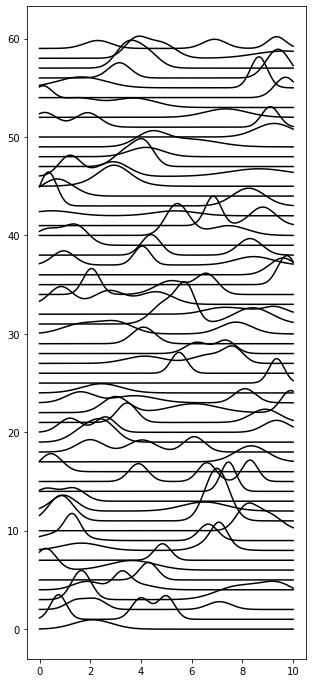

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5,12))
for i in range(n):
    ax.plot(position_grid, p[:,i]/2+i, 'k')

plt.show()

In [35]:
p_fwd = pos_firing_rate(position_grid, tuning_curves[40:60], PFR)
p_bwd = pos_firing_rate(position_grid, tuning_curves[40:60], PFR)
print(p_fwd.shape)

(201, 20)


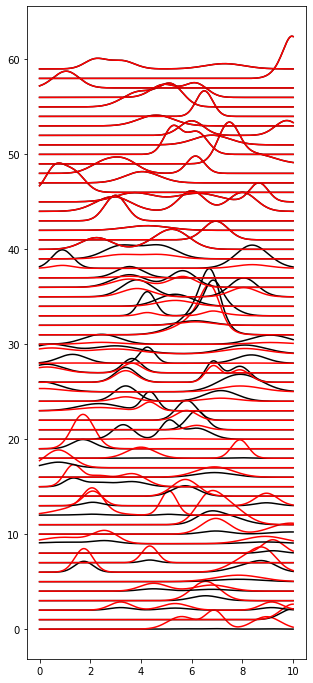

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(5,12))
for i in range(n):
    ax.plot(position_grid, p_fwd[:,i]/2+i, 'k', label='fwd')
    ax.plot(position_grid, p_bwd[:,i]/2+i, 'r', label='bwd')

plt.show()

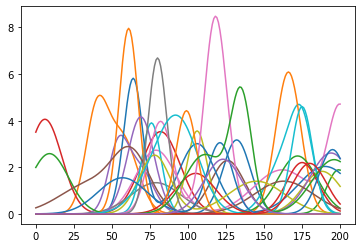

In [35]:
plt.plot(p)
plt.show()

## 3. Generate spikes

In [18]:
position.shape

(4069,)

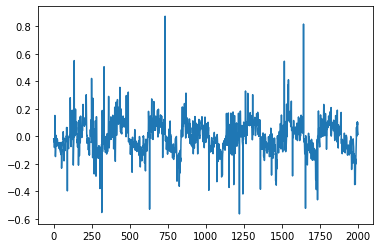

In [42]:
plt.plot(np.diff(position))
# plt.ylim((-.6,.5))

In [26]:
spikes = np.zeros((position.shape[0],60))

In [50]:
spikes[fwd,:] = np.random.poisson(lam=pos_firing_rate(position[fwd], tuning_curves, PFR*fwd_weight))
spikes[bwd,:] = np.random.poisson(lam=pos_firing_rate(position[bwd], tuning_curves, PFR*bwd_weight))
spikes.shape

(4069, 60)

In [22]:
# np.savez('simulated3_spike_maze2_60.npz', spikes=spikes, position=position, tuning_curves=tuning_curves, PFR=PFR, p=[p_fwd, p_bwd], idx=idx)
data = np.load('simulated3_spike_maze2_60.npz', allow_pickle=True)
tuning_curves=data['tuning_curves']
PFR=data['PFR']

In [18]:
tuning_curves[0].stats()[0]

array([8.95, 6.9 , 5.6 ])

In [19]:
# non-directional
spikes = np.random.poisson(lam=pos_firing_rate(position, tuning_curves, PFR))

Text(0, 0.5, 'position')

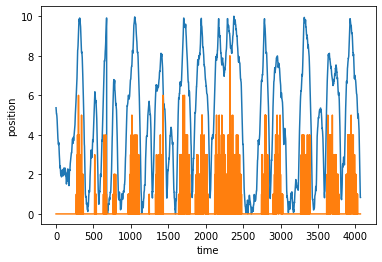

In [20]:
plt.plot(position)
plt.plot(spikes[:,32])
plt.xlabel('time')
plt.ylabel('position')

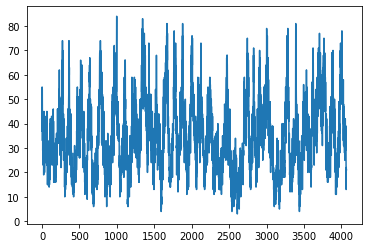

In [52]:
plt.plot(spikes.sum(axis=1))

In [77]:
np.where(spikes.sum(axis=1)==0)[0].shape

(0,)

In [53]:
np.savez('simulated3_spike_maze2_nond_60.npz', spikes=spikes, position=position, tuning_curves=tuning_curves, PFR=PFR, p=[p_fwd, p_bwd], idx=idx)

In [21]:
np.savez('simulated3_spike_maze2_nond_60.npz', spikes=spikes, position=position, tuning_curves=tuning_curves, PFR=PFR, p=p, idx=idx)

In [15]:
position = np.load('simulated2_spike.npz')['position']
spikes = np.load('simulated2_spike.npz')['spikes']

In [22]:
from scipy.io import savemat

In [23]:
spikes[:,40:60].shape

(4069, 20)

In [24]:
dic = {'position': position, 'spikes': spikes, 'p': p}
dic

{'position': array([5.3701589 , 5.31617838, 5.23532377, ..., 0.83136787, 0.82637313,
        0.82866757]),
 'spikes': array([[0, 3, 0, ..., 1, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [0, 7, 0, ..., 0, 2, 0],
        ...,
        [0, 5, 2, ..., 0, 0, 0],
        [0, 3, 0, ..., 0, 0, 0],
        [1, 6, 0, ..., 0, 0, 0]]),
 'p': array([[3.87419116e-02, 2.90248366e-01, 2.40406355e-03, ...,
         3.39429223e-13, 9.89540513e-16, 1.29925839e-04],
        [4.65284082e-02, 4.18960589e-01, 3.77486684e-03, ...,
         8.16808812e-13, 2.07437064e-15, 1.94874602e-04],
        [5.56338078e-02, 5.89634954e-01, 5.83422111e-03, ...,
         1.94059746e-12, 4.60072853e-15, 2.89698007e-04],
        ...,
        [9.07631846e-24, 5.16673351e-47, 2.56131946e-08, ...,
         4.23442612e-28, 1.44038951e+00, 7.32898693e-01],
        [4.54954987e-24, 5.62264543e-48, 1.34168709e-08, ...,
         1.37741400e-28, 1.42522989e+00, 5.85559496e-01],
        [2.27044286e-24, 5.98254380e-49, 6.94814063e

In [25]:
savemat('simulated3_spike_maze2_nond_60.mat', dic)

In [55]:
p_bwd.shape

(201, 25)

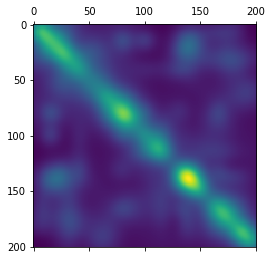

In [26]:
plt.matshow(p@p.T)

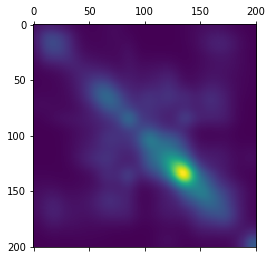

In [58]:
plt.matshow(p_fwd@p_fwd.T)

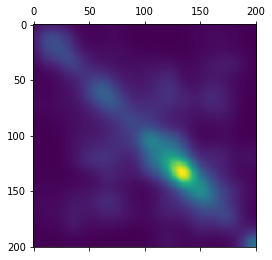

In [59]:
plt.matshow(p_fwd@p_bwd.T)